In [1]:
from infer import infer

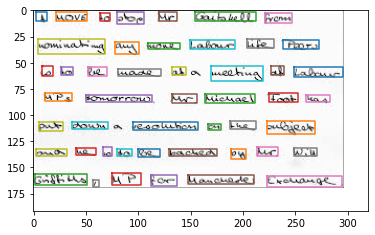

In [2]:
infer('../data/test/images.jpg')